In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/__huggingface_repos__.json
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_4/config.json
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_4/model.safetensors
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_4/generation_config.json
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_1/config.json
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_1/model.safetensors
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_1/generation_config.json
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_2/config.json
/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_mo

In [2]:
from datasets import load_dataset

dataset = load_dataset("arampacha/rsicd", split="test")

dataset_infos.json: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/419M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/55.1M [00:00<?, ?B/s]

data/valid-00000-of-00001.parquet:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8734 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1093 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/1094 [00:00<?, ? examples/s]

In [3]:
print(dataset)

Dataset({
    features: ['filename', 'captions', 'image'],
    num_rows: 1093
})


# Comparitive inference for base and fine-tuned model
Fine-tune epoch 3

In [4]:
import torch
from transformers import BlipForConditionalGeneration, AutoProcessor
from datasets import load_dataset
from PIL import Image

# --- 1. Setup Device and Data ---
# Check for CUDA availability and set the device accordingly
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Load the test dataset
# Note: Ensure the split is correct for your needs (e.g., 'test' or 'validation')
dataset = load_dataset("arampacha/rsicd", split="test")

# --- 2. Load Models and Processors ---

# 2a. Load the base BLIP model
base_model_name = "Salesforce/blip-image-captioning-base"
base_model = BlipForConditionalGeneration.from_pretrained(base_model_name).to(device)

# 2b. Load the fine-tuned model
# Check the path to ensure it's correct within your Kaggle environment
finetuned_model_path = "/kaggle/input/rsicd-blip-image-caption-fine-tuned/transformers/1/1/kaggle/working/new_model_epoch_3"
finetuned_model = BlipForConditionalGeneration.from_pretrained(finetuned_model_path).to(device)

# Load the processor (it's the same for both models)
processor = AutoProcessor.from_pretrained(base_model_name)

print("\nModels and Processor loaded successfully.")

2025-11-17 08:23:02.206019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763367782.439136      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763367782.508826      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Using device: cpu


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]


Models and Processor loaded successfully.


In [5]:
# --- 3. Define the Captioning Function ---

def generate_caption(model, image: Image.Image, processor, device):
    """Generates a caption for a given image using the specified model."""
    # Process the image
    # Note: Images in the RSICD dataset from 'arampacha/rsicd' are typically stored in the 'image' column.
    inputs = processor(images=image, return_tensors="pt").to(device)

    # Generate the caption
    # Use 'num_beams=4' for better quality captions (typical setting)
    # Use 'max_length=50' to control the length of the output
    outputs = model.generate(
        **inputs,
        max_length=50,
        num_beams=4,
        early_stopping=True
    )

    # Decode the generated ID's back into text
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption


--- Generating Captions for 5 Random Images ---

--- Image 1 (Index: 231) ---
Ground Truth: Along a street are buildings with brick red roofs among which there is a church with a cross-shaped roof.
Base Model Predicted: **An aerial view of a small town**
Finetuned Model Predicted: **A church is close to several green trees.**
------------------------------
--- Image 2 (Index: 442) ---
Ground Truth: In addition to a road and two lines of trees, a factory is built with blue and green roofs.
Base Model Predicted: **An aerial view of a large green city**
Finetuned Model Predicted: **Many green buildings and trees are located in an industrial area.**
------------------------------
--- Image 3 (Index: 262) ---
Ground Truth: Many large buildings have been built here.
Base Model Predicted: **An aerial view of a city with many buildings**
Finetuned Model Predicted: **Many buildings are in a commercial area.**
------------------------------
--- Image 4 (Index: 860) ---
Ground Truth: There is a 

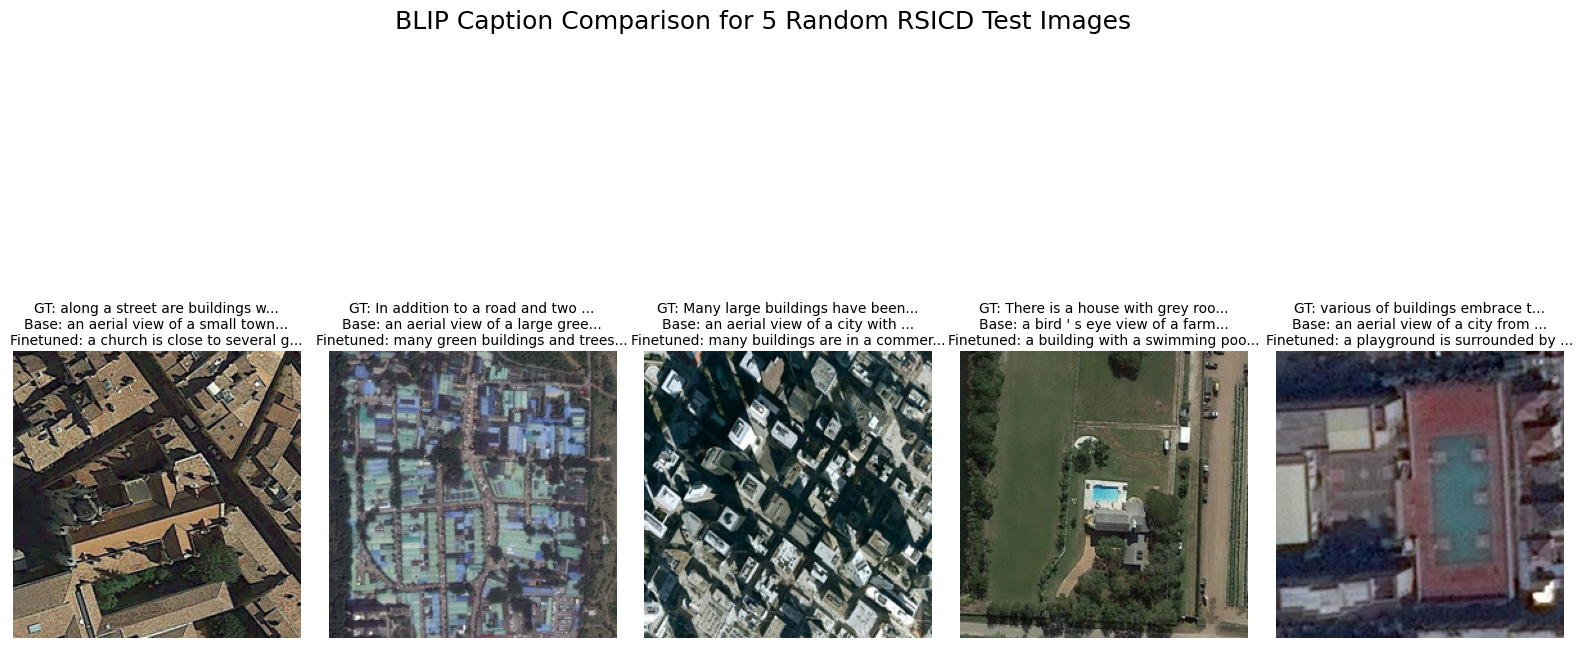

In [6]:
import random
import matplotlib.pyplot as plt

# --- Random Selection and Caption Generation ---
num_images_to_sample = 5
# Get 5 random indices from the dataset
random_indices = random.sample(range(len(dataset)), num_images_to_sample)

# Set up the plot for comparison (adjust figure size for two caption lines)
# Using 5 columns and 1 row for the images
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace=0.1, hspace=0.4) # Adjust space between plots

print("\n--- Generating Captions for 5 Random Images ---\n")

for i, index in enumerate(random_indices):
    sample = dataset[index]
    image = sample["image"]

    # RSICD has a list of 5 ground truth captions for each image
    ground_truth_captions = sample["captions"]
    # For printing and display title, we'll use the first one
    representative_caption = ground_truth_captions[0]

    # --- Generate Captions for BOTH Models ---
    base_caption = generate_caption(base_model, image, processor, device)
    finetuned_caption = generate_caption(finetuned_model, image, processor, device)

    # --- Create Title String for Plot ---
    # Prepare a title string with both captions for display
    plot_title = (
        f"GT: {representative_caption[:30]}...\n"
        f"Base: {base_caption[:30]}...\n"
        f"Finetuned: {finetuned_caption[:30]}..."
    )

    # --- Print the detailed results ---
    print(f"--- Image {i+1} (Index: {index}) ---")
    print(f"Ground Truth: {representative_caption.capitalize()}")
    print(f"Base Model Predicted: **{base_caption.capitalize()}**")
    print(f"Finetuned Model Predicted: **{finetuned_caption.capitalize()}**")
    print("-" * 30)

    # --- Display the image ---
    plt.subplot(1, num_images_to_sample, i + 1)
    plt.imshow(image)
    plt.title(plot_title, fontsize=10, wrap=True) # Use the combined title
    plt.axis("off")

plt.suptitle(
    f'BLIP Caption Comparison for {num_images_to_sample} Random RSICD Test Images',
    fontsize=18,
    y=0.98 # Move title up slightly
)
plt.show()


--- Starting Comparative BLEU-4 Evaluation on the full test set ---



Evaluating Both Models:   0%|          | 0/1093 [00:00<?, ?it/s]


Final BLEU-4 Comparison (1093 Samples)
**Average BLEU-4 Score (Base Model)**:      4.66%
**Average BLEU-4 Score (Fine-Tuned Model)**: 19.41%
Success! Fine-tuning improved the BLEU-4 score by: 14.75 percentage points.


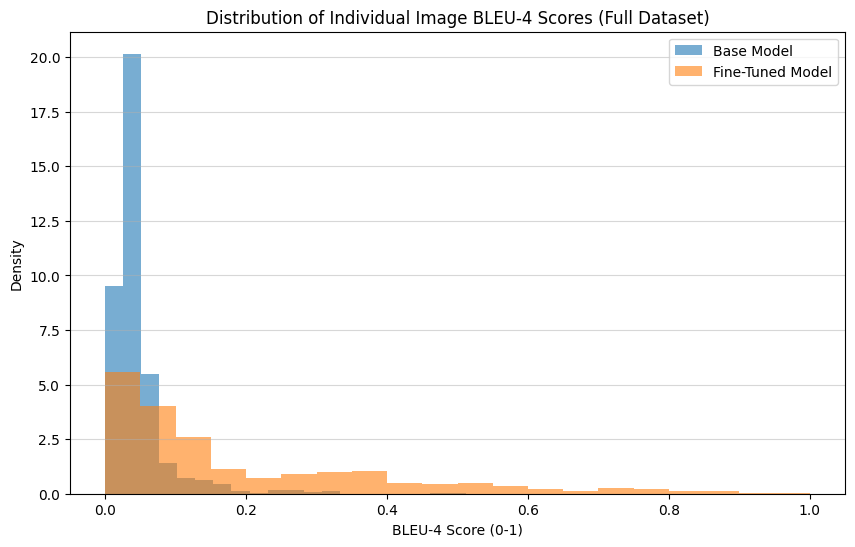

In [7]:
import torch
from transformers import BlipForConditionalGeneration, AutoProcessor
from datasets import load_dataset
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Lists to store BLEU scores for both models
base_model_bleu_scores = []
finetuned_model_bleu_scores = []

# Initialize the smoothing function object
chencherry_smoothing = SmoothingFunction()

# --- Helper Function to Streamline Generation ---
def generate_and_score(model, example, processor, device):
    """Generates a caption and calculates the BLEU score with smoothing."""
    image = example["image"]

    # --- Model Inference Steps ---
    inputs = processor(images=image, return_tensors="pt").to(device)
    pixel_values = inputs.pixel_values

    # Using the same generation parameters for fair comparison
    generated_ids = model.generate(
        pixel_values=pixel_values,
        max_length=50,
        num_beams=4,
        early_stopping=True
    )
    generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    # Corrected dataset key: using 'text'
    reference = [ caption.split() for caption in example["captions"] ]

    # Calculate BLEU score (defaults to BLEU-4) with smoothing
    bleu_score = sentence_bleu(reference,
                               generated_caption.split(),
                               smoothing_function=chencherry_smoothing.method1
                              )
    return bleu_score

# --- Main Evaluation Loop: Separate Progress Bars for Profiling ---
print("\n--- Starting Comparative BLEU-4 Evaluation on the full test set ---\n")

for i, example in enumerate(tqdm(dataset, desc="Evaluating Both Models")):
    # 1. Evaluate Fine-Tuned Model
    finetuned_bleu = generate_and_score(finetuned_model, example, processor, device)
    finetuned_model_bleu_scores.append(finetuned_bleu)

    # 2. Evaluate Base Model
    base_bleu = generate_and_score(base_model, example, processor, device)
    base_model_bleu_scores.append(base_bleu)

# --- Final Results Calculation and Printing (UPDATED) ---
# Calculate the average score for both lists
dataset_size = len(dataset)
avg_finetuned_bleu = sum(finetuned_model_bleu_scores) / dataset_size
avg_base_bleu = sum(base_model_bleu_scores) / dataset_size

# --- Convert to Percentage ---
percent_finetuned_bleu = avg_finetuned_bleu * 100
percent_base_bleu = avg_base_bleu * 100
percent_improvement = percent_finetuned_bleu - percent_base_bleu

print("\n" + "=" * 50)
print(f"Final BLEU-4 Comparison ({dataset_size} Samples)")
print("=" * 50)
# Print the scores as percentages
print(f"**Average BLEU-4 Score (Base Model)**:      {percent_base_bleu:.2f}%")
print(f"**Average BLEU-4 Score (Fine-Tuned Model)**: {percent_finetuned_bleu:.2f}%")
print("=" * 50)
if percent_improvement > 0:
    print(f"Success! Fine-tuning improved the BLEU-4 score by: {percent_improvement:.2f} percentage points.")
else:
    print("Improvement not observed based on average BLEU-4 score.")

# --- Visualize Score Distribution ---
# ... (visualization code remains the same, as the lists contain the raw 0-1 scores) ...
plt.figure(figsize=(10, 6))
plt.hist(base_model_bleu_scores, bins=20, alpha=0.6, label='Base Model', density=True)
plt.hist(finetuned_model_bleu_scores, bins=20, alpha=0.6, label='Fine-Tuned Model', density=True)
plt.title('Distribution of Individual Image BLEU-4 Scores (Full Dataset)')
plt.xlabel('BLEU-4 Score (0-1)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()